In [6]:
datafromkaggle = False
!tar xzvf /content/setup-002-segmentations.tar.gz
!mv /content/setup-002-segmentations.tar.gz /content/setup-002-segmentations.tar.gz_bkp

misc/
misc/20220614_134218_Gurkenfoto_rescaled_640.jpg
misc/20220614_134218_Gurkenfoto_2.jpg
misc/setup-002-standalone.yaml
misc/20220614_134218_Gurkenfoto.jpg
test/
test/labels/
test/labels/dsc01843.txt
test/images/
test/images/dsc01843.png
train/
train/labels/
train/labels/dsc01828.txt
train/labels/dsc01826.txt
train/images/
train/images/dsc01828.png
train/images/dsc01826.png
val/
val/labels/
val/labels/dsc01841.txt
val/images/
val/images/dsc01841.png


In [3]:
if datafromkaggle:
    # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
    # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
    # THEN FEEL FREE TO DELETE THIS CELL.
    # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
    # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
    # NOTEBOOK.

    import os
    import sys
    from tempfile import NamedTemporaryFile
    from urllib.request import urlopen
    from urllib.parse import unquote, urlparse
    from urllib.error import HTTPError
    from zipfile import ZipFile
    import tarfile
    import shutil

    CHUNK_SIZE = 40960
    DATA_SOURCE_MAPPING = 'setup-002-standalone-yolo:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5761334%2F9477351%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240925%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240925T093502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c2127ecdb11f7b6b8485e136893ba7b07513f605135802b644d08685c0b8bfd4eea07119d7230c813c339d30c7464d48084895be258980415a07fdbc7427d0c6b0ebd5a300d728ddfc8fc79be8d79a62b0bc3af1b10505634ca9e9ba4797fa226a8787e294259122e6862f1afff93f5504e6e83f20e4249496318f905cf05b231403b1729c08c179f7240c9570852d2d6223a65d17e2cf16af36e74c71211b4219711a1da1f8e473de2f7318df69c1d93c636f8bad5ac6c2fd98663e8592ddd22f510e2334e506456b6235c4b3709f33b74dc80ab2b2e7f8c7645c10041cb78a64f89b2865d3cc5f981888af818dd717455a7e2a242dc41d91907723a9adcb5'
    # Old dataset version:
    #DATA_SOURCE_MAPPING = 'setup-002-standalone-yolo:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5761334%2F9473393%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240924%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240924T195232Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e6523de5d924639ed617c715145bf5f62b8431198504bdf0d32b3cf1116d7cb909069a2c4838564ff6598cf83aee312a9440bc31cb7bff22262a86a709603ba4daabaed451dbb53f59622158532845c9df1235f8b5bf2d62e603348224a1bb5a41ee889a48f5c29c3ba8a2af18ae868c02c08fd9305873a3927d12fac5dab38c32d861af23f79e9f8cad7530ee74f3b455552ca9e27276f02109dd832a64d58d098b0f0d3ad34cb53bee619b6dd4d10ac5c9a434cb37f9bc7338892ccbdef640f0feaadcf4890a58d8aa8c82b4df5a7aad122c509d0e093e1617ec7e20368cc4acdf25586a0a06af3a4594c4668f896b372108d166397bf69ca7cfa685c94ac'

    KAGGLE_INPUT_PATH='/kaggle/input'
    KAGGLE_WORKING_PATH='/kaggle/working'
    KAGGLE_SYMLINK='kaggle'

    !umount /kaggle/input/ 2> /dev/null
    shutil.rmtree('/kaggle/input', ignore_errors=True)
    os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
    os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

    try:
      os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
    except FileExistsError:
      pass
    try:
      os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
    except FileExistsError:
      pass

    for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
        directory, download_url_encoded = data_source_mapping.split(':')
        download_url = unquote(download_url_encoded)
        filename = urlparse(download_url).path
        destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
        try:
            with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
                total_length = fileres.headers['content-length']
                print(f'Downloading {directory}, {total_length} bytes compressed')
                dl = 0
                data = fileres.read(CHUNK_SIZE)
                while len(data) > 0:
                    dl += len(data)
                    tfile.write(data)
                    done = int(50 * dl / int(total_length))
                    sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                    sys.stdout.flush()
                    data = fileres.read(CHUNK_SIZE)
                if filename.endswith('.zip'):
                  with ZipFile(tfile) as zfile:
                    zfile.extractall(destination_path)
                else:
                  with tarfile.open(tfile.name) as tarfile:
                    tarfile.extractall(destination_path)
                print(f'\nDownloaded and uncompressed: {directory}')
        except HTTPError as e:
            print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
            continue
        except OSError as e:
            print(f'Failed to load {download_url} to path {destination_path}')
            continue

    print('Data source import complete.')


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



## Install ultralytics?

In [5]:
%pip -q install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 50.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Loading data and annotations from setup_002 with YOLO annotations:

Note: Download data as "Input" via Kaggle web interface ... for the moment. ;-)

In [7]:
if datafromkaggle:
    !ls -lh /kaggle/input/setup-002-standalone-yolo/*
    !ls -lh /kaggle/input/setup-002-standalone-yolo/*/*


In [ ]:
!pwd

/content


Okay, so the few images and labels are there. Next: Import YOLO model for training?!
Note: For now, only Bboxes, no segmentations yet!

## Import YOLO model for training

In [8]:
# First try to get tensorboard running:
%load_ext tensorboard

#import tensorflow as tf
import datetime

In [9]:
# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolov8s.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 48.7MB/s]


### Train with yaml file from kaggle setup folder

In [ ]:
#!ls /kaggle/input/setup-002-standalone-yolo/val/images

In [11]:
!cat /content/misc/setup-002-standalone.yaml

# 
# Documentation: https://docs.ultralytics.com/datasets/detect/coco8/
# Example usage: yolo train data=coco8.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── coco8  ← downloads here (1 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/ # dataset root dir
# TODO: evtl. weitere Ebene einfügen? Weird. 
train: train/images # train images (relative to 'path') 2 images
val: val/images # val images (relative to 'path') 1 image
test: test/images # test images (optional) 1 image

# Classes
names:
  0: cucumber
# 1: bicycle
# 2: car
#   3: motorcycle
#   4: airplane
#   5: bus
#   6: train
#   7: truck
#   8: boat
#   9: traffic light
#   10: fire hydrant
#   11: stop sign
#   12: parking meter
#   13: bench
#   14: bird
#   15: cat
#   16: dog
#   17: horse
#   18: sheep
#   19: cow
#   20: elephant
#   21: bear
#   22: zebra
#   23: giraffe
#   24: backpack
#   25: umbrella
#   26: handbag
#   

In [12]:
# Train the model
#trainresults = model.train(data="/content/setup-002-standalone.yaml", epochs=100, imgsz=1280)
trainresults = model.train(data="/content/misc/setup-002-standalone.yaml", epochs=100, imgsz=1280)

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/misc/setup-002-standalone.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 110MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 290MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 24.80it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/val/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

val: New cache created: /content/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.74G       2.18      2.968      2.443        102       1280: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all          1          7      0.482       0.27      0.188     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.42G       1.91      2.845      2.421         39       1280: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


                   all          1          7      0.474      0.263      0.213     0.0812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.54G      1.606      2.838      2.002         91       1280: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          1          7      0.314      0.286      0.141     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.67G      1.779      2.328      2.356         53       1280: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


                   all          1          7      0.315      0.286      0.141     0.0632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.63G      1.737      2.746      2.219         37       1280: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          1          7      0.311      0.286      0.137     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.6G      1.801      2.537      2.211         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all          1          7      0.255      0.714      0.246     0.0734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.65G      1.556      2.079       1.97         44       1280: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all          1          7      0.328      0.714      0.271      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.75G      1.536      1.609      1.896         93       1280: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all          1          7      0.333      0.286      0.209     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.64G      1.353      1.568      1.853         49       1280: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all          1          7      0.188      0.286      0.131     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.71G      1.307      1.441       1.74         67       1280: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.90it/s]

                   all          1          7      0.109      0.286      0.149     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.63G      1.424       1.44      1.817         95       1280: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          1          7     0.0314      0.714     0.0352    0.00956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.71G       1.52       1.44      1.728         70       1280: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all          1          7     0.0665      0.143     0.0421     0.0116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.64G      1.417      1.922      1.792         39       1280: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all          1          7     0.0382      0.286       0.04     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       3.7G      1.724      2.043      1.898         68       1280: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all          1          7      0.059      0.429      0.327     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.7G       1.98      1.971      2.141         74       1280: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all          1          7          1      0.143      0.344     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.66G      1.585      1.794      1.933         57       1280: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          1          7      0.117      0.286      0.146     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.75G      1.495      1.441      1.822         94       1280: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.54it/s]

                   all          1          7      0.359      0.429      0.338      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.64G      1.585      1.783      1.955         42       1280: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all          1          7      0.359      0.429      0.338      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.73G      1.712      2.676      2.103         31       1280: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all          1          7      0.319      0.286      0.309     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.68G      1.614      1.898       1.83         63       1280: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]

                   all          1          7      0.319      0.286      0.309     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.72G      1.473      2.242       1.88         30       1280: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.08it/s]

                   all          1          7      0.111      0.571      0.225     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.64G      1.865      2.051      2.218         38       1280: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          1          7      0.111      0.571      0.225     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.74G      1.415       1.58      1.821         42       1280: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          1          7     0.0926      0.857      0.102     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.67G      1.656      1.406      1.899        114       1280: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          1          7     0.0926      0.857      0.102     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.75G      1.607      1.435      1.897         42       1280: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all          1          7      0.166      0.714      0.182     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.66G      1.669      1.558      1.957         46       1280: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all          1          7      0.166      0.714      0.182     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.7G      1.321      1.284       1.76         81       1280: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all          1          7        0.5      0.143      0.139     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.66G      1.645      1.615      2.004         51       1280: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.94it/s]

                   all          1          7        0.5      0.143      0.139     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.72G      1.527      1.421      1.822         76       1280: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          1          7      0.281      0.286      0.148     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.65G      1.518        1.6      1.883         46       1280: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          1          7      0.281      0.286      0.148     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.74G      1.558      1.703      1.974         40       1280: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


                   all          1          7       0.15      0.143      0.114     0.0229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.58G      1.245      1.332      1.568         86       1280: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all          1          7       0.15      0.143      0.114     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.67G      1.553      1.606      1.959         62       1280: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.99it/s]

                   all          1          7      0.147      0.143     0.0629     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.64G      1.763      2.153      2.177         27       1280: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]

                   all          1          7      0.147      0.143     0.0629     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.74G      1.462      1.496      1.902         42       1280: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          1          7      0.114      0.143     0.0601    0.00957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.65G      1.422      1.531      1.906         44       1280: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all          1          7      0.114      0.143     0.0601    0.00957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.69G      1.264      1.362      1.673         70       1280: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          1          7      0.087      0.286     0.0786     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.67G      1.557      1.479      1.927         41       1280: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.19it/s]

                   all          1          7      0.087      0.286     0.0786     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.75G      1.497      1.641      1.813         55       1280: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all          1          7     0.0769      0.429       0.11     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.65G      1.676      2.143      2.035         32       1280: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all          1          7     0.0769      0.429       0.11     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.75G      1.369      1.342      1.757         41       1280: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all          1          7     0.0283      0.286     0.0186    0.00462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.63G      1.607      1.427      1.898         43       1280: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


                   all          1          7     0.0283      0.286     0.0186    0.00462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.74G      1.395      1.354      1.916         38       1280: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all          1          7       0.04      0.429     0.0348    0.00681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.67G      1.585      1.783      1.972         56       1280: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          1          7       0.04      0.429     0.0348    0.00681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.78G      1.566      1.482      1.993         40       1280: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all          1          7      0.031      0.429     0.0224    0.00677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.65G      1.666      1.653      2.053         43       1280: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all          1          7      0.031      0.429     0.0224    0.00677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.8G      1.554       1.34      1.823         64       1280: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          1          7     0.0149      0.286    0.00991    0.00265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.64G      1.329      1.321       1.79         49       1280: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          1          7     0.0149      0.286    0.00991    0.00265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.67G      1.807      1.471      1.918        118       1280: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          1          7     0.0174      0.429     0.0125    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.63G      1.606      1.433      1.932         90       1280: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all          1          7     0.0174      0.429     0.0125    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.74G      1.746      1.544      2.072         36       1280: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


                   all          1          7     0.0256      0.286     0.0422    0.00448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.7G       1.44      1.465      1.903         64       1280: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all          1          7     0.0256      0.286     0.0422    0.00448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.75G      1.666      1.438      1.965        102       1280: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]

                   all          1          7     0.0256      0.286     0.0422    0.00448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.74G      1.498      1.438      1.849         46       1280: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all          1          7     0.0206      0.571     0.0167    0.00525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.67G      1.473      1.466      1.891         54       1280: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


                   all          1          7     0.0206      0.571     0.0167    0.00525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.76G      1.373       1.27      1.747         47       1280: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          1          7     0.0206      0.571     0.0167    0.00525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.74G      1.407      1.341      1.768         98       1280: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all          1          7     0.0247      0.429     0.0261    0.00563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.61G      1.578      1.261      2.028         77       1280: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.93it/s]

                   all          1          7     0.0247      0.429     0.0261    0.00563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.74G      1.323      1.156      1.755         89       1280: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


                   all          1          7     0.0247      0.429     0.0261    0.00563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.67G      1.498      1.319      1.832        120       1280: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all          1          7     0.0323      0.143     0.0226    0.00332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.74G      1.275      1.219      1.696         84       1280: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all          1          7     0.0323      0.143     0.0226    0.00332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.71G      1.448      1.352      1.806         83       1280: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all          1          7     0.0323      0.143     0.0226    0.00332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.7G      1.707      2.812      1.917         28       1280: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all          1          7     0.0556      0.286      0.188     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.65G      1.602      1.559      2.077         44       1280: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]

                   all          1          7     0.0556      0.286      0.188     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.68G      1.503      1.186      1.744        115       1280: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.57it/s]

                   all          1          7     0.0556      0.286      0.188     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.76G      1.479      1.332      1.836         93       1280: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all          1          7      0.047      0.571     0.0978     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.6G      1.979      1.848       2.14         24       1280: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all          1          7      0.047      0.571     0.0978     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.77G      1.588      1.207      1.911        116       1280: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all          1          7      0.047      0.571     0.0978     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.76G      1.511      1.267      1.709        100       1280: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          1          7     0.0769      0.143     0.0332     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.61G      1.668       1.52      1.928         27       1280: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all          1          7     0.0769      0.143     0.0332     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.7G        1.4      1.134      1.564         78       1280: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          1          7     0.0769      0.143     0.0332     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.78G      1.552      1.462      1.911         40       1280: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all          1          7     0.0432      0.714     0.0616     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.66G      1.839      1.554      2.079         35       1280: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.53it/s]

                   all          1          7     0.0432      0.714     0.0616     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.77G      1.222      1.263      1.613         48       1280: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          1          7     0.0432      0.714     0.0616     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.79G      1.607      1.385      1.991         54       1280: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all          1          7     0.0941      0.571     0.0735     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.75G      1.367      1.122      1.625         93       1280: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all          1          7     0.0941      0.571     0.0735     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.73G      1.352      1.283      1.757         86       1280: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


                   all          1          7     0.0941      0.571     0.0735     0.0168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.68G       1.09       1.09      1.536         68       1280: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all          1          7     0.0565      0.143     0.0314    0.00911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.66G      1.282        1.2      1.718         52       1280: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.55it/s]

                   all          1          7     0.0565      0.143     0.0314    0.00911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.72G       1.27      1.178      1.601         78       1280: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          1          7     0.0565      0.143     0.0314    0.00911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.72G      1.688      1.805       2.13         26       1280: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          1          7      0.122      0.143     0.0472     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       3.7G      1.235       1.03      1.549         73       1280: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all          1          7      0.122      0.143     0.0472     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.72G      1.416      1.514      1.851         47       1280: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


                   all          1          7      0.122      0.143     0.0472     0.0141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.75G      1.569        1.4      1.935         43       1280: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          1          7      0.332      0.143      0.188     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.67G      1.469      1.182      1.821         52       1280: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all          1          7      0.332      0.143      0.188     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.75G      1.086     0.9848      1.492         98       1280: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all          1          7      0.332      0.143      0.188     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       3.7G      1.289      1.129      1.736         73       1280: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          1          7      0.332      0.143      0.188     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.71G      1.575      1.256      1.943         74       1280: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all          1          7      0.721      0.143      0.217     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       3.6G      1.876       1.64      2.018         26       1280: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all          1          7      0.721      0.143      0.217     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.76G      1.286      1.122      1.659         97       1280: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          1          7      0.721      0.143      0.217     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.72G      1.336      1.606      1.649         31       1280: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all          1          7      0.721      0.143      0.217     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.73G      1.666      1.549      2.167         26       1280: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          1          7      0.116      0.714      0.115     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.65G      1.273      1.097      1.819         31       1280: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


                   all          1          7      0.116      0.714      0.115     0.0263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.72G       1.28      1.308       1.76         31       1280: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.73it/s]

                   all          1          7      0.116      0.714      0.115     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.71G      1.463      1.348      1.947         29       1280: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.54it/s]

                   all          1          7      0.116      0.714      0.115     0.0263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.72G      1.402      1.231      1.928         31       1280: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          1          7      0.119      0.571      0.107     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.62G      1.782      1.429      2.102         24       1280: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all          1          7      0.119      0.571      0.107     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.72G      1.146      1.044      1.551         31       1280: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all          1          7      0.119      0.571      0.107     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.74G      1.312      1.175      1.839         31       1280: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


                   all          1          7      0.119      0.571      0.107     0.0219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.71G      1.644      1.488       1.91         25       1280: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all          1          7      0.651      0.143      0.198     0.0345



100 epochs completed in 0.092 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]


                   all          1          7      0.332      0.714      0.272     0.0913
Speed: 0.9ms preprocess, 42.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


## Tensorboard:

In [ ]:
# Show tensorboard:
#%tensorboard --logdir /content/runs/detect #path/to/runs



## Show the predictions?!

In [14]:
#predictresults = model(["image1.jpg", "image2.jpg"])  # return a list of Results objects

# # Run inference on 'bus.jpg' with arguments
# model.predict("bus.jpg", save=True, imgsz=320, conf=0.5)

results = model.predict([#"/kaggle/input/setup-002-standalone-yolo/setup-002-standalone-yolo/test/images/dsc01843.png",
                          #"/kaggle/input/setup-002-standalone-yolo/20220614_134218_Gurkenfoto_2.jpg",
                          "/content/misc/20220614_134218_Gurkenfoto_rescaled_640.jpg"
                         ],
                        imgsz=1280,
                        conf=0.5,
                        #show=True,
                        save=True)

# for result in results:
#   boxes = result.boxes
#   probs = result.probs
#   #result.show()

# # Process result:
# # for result in results:
# boxes = result.boxes  # Boxes object for bounding box outputs
# # masks = result.masks  # Masks object for segmentation masks outputs
# # keypoints = result.keypoints  # Keypoints object for pose outputs
# probs = result.probs  # Probs object for classification outputs
# obb = result.obb  # Oriented boxes object for OBB outputs
# result.show()  # display to screen


0: 960x1280 6 cucumbers, 86.2ms
Speed: 8.4ms preprocess, 86.2ms inference, 2.4ms postprocess per image at shape (1, 3, 960, 1280)
Results saved to runs/detect/train2


### Show resulting pictures:

In [15]:
from IPython.display import Image
#Image(filename='/content/runs/detect/train53/20220614_134218_Gurkenfoto_2.jpg', width=400)


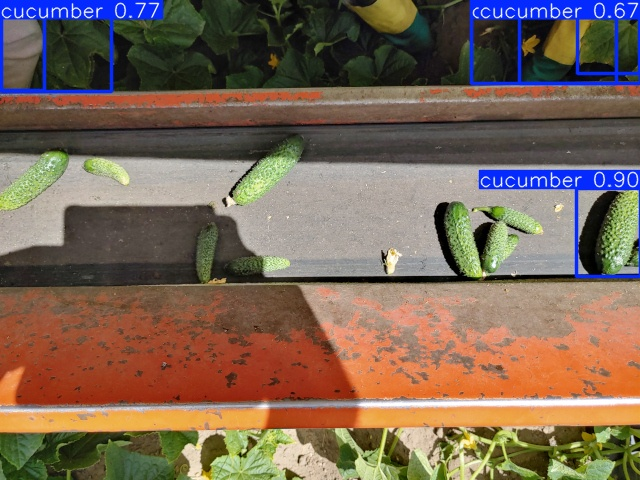

In [17]:
Image(filename='/content/runs/detect/train2/20220614_134218_Gurkenfoto_rescaled_640.jpg', width=400)


In [ ]:
Image(filename='/content/runs/detect/train53/dsc01843.png', width=400)